In [1]:
! python --version

Python 3.10.6


## SEER Breast Cancer Dataset: Feature Selection and Classification
### Sarah Warda

<br>

The purpose of this notebook is to select the top 5 features and fit a decision tree classifier so we may recreate it via a tableau dashboard.

The `SEER Breast Cancer Dataset` can be found at this link: https://ieee-dataport.org/open-access/seer-breast-cancer-data

<br>

*You may need to install graphviz via conda using the terminal before running the notebook instead.*

In [2]:
%matplotlib inline

In [3]:
! pip install graphviz

In [4]:
! pip install pydotplus

In [5]:
import numpy as np
import random as py_random
import numpy.random as np_random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import graphviz
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

In [6]:
df = pd.read_csv('SEER Breast Cancer clean.csv')
df.head()

,Age,Race,MaritalStatus,TStage,NStage,6thStage,Grade,AStage,TumorSize,EstrogenStatus,ProgesteroneStatus,RegionalNodeExamined,RegionalNodePositive,SurvivalMonths,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


### Feature Selection via ANOVA f-test

For feature selection, we need to convert all strings to integer values.

In [7]:
# Target Variable encoding

df['Status_str'] = df['Status']
status_map = {'Alive':1, 'Dead':0}
df['Status'] = df['Status'].map(status_map)


# all feature encodings

df['Race_str'] = df['Race']
race_map = {'Other (American Indian/AK Native, Asian/Pacific Islander)':3, 'Black':2, 'White':1}
df['Race'] = df['Race'].map(race_map)


df['MaritalStatus_str'] = df['MaritalStatus']
marital_map = {'Separated':5, 'Widowed':4, 'Divorced':3, 'Married (including common law)':2, 'Single (never married)':1}
df['MaritalStatus'] = df['MaritalStatus'].map(marital_map)

df['TStage_str'] = df['TStage']
tstage_map = {'T4':4, 'T3':3, 'T2':2, 'T1':1}
df['TStage'] = df['TStage'].map(tstage_map)


df['NStage_str'] = df['NStage']
nstage_map = {'N3':3, 'N2':2, 'N1':1}
df['NStage'] = df['NStage'].map(nstage_map)


df['6thStage_str'] = df['6thStage']
sixstage_map = {'IIIB':5, 'IIIC':4, 'IIIA':3, 'IIB':2, 'IIA':1}
df['6thStage'] = df['6thStage'].map(sixstage_map)


df['Grade_str'] = df['Grade']
grade_map = {'Undifferentiated; anaplastic; Grade IV':4, 'Poorly differentiated; Grade III':3, 
             'Moderately differentiated; Grade II':2, 'Well differentiated; Grade I':1}
df['Grade'] = df['Grade'].map(grade_map)


df['AStage_str'] = df['AStage']
astage_map = {'Regional':2, 'Distant':1}
df['AStage'] = df['AStage'].map(astage_map)


df['EstrogenStatus_str'] = df['EstrogenStatus']
estrogen_map = {'Negative':2, 'Positive':1}
df['EstrogenStatus'] = df['EstrogenStatus'].map(estrogen_map)


df['ProgesteroneStatus_str'] = df['ProgesteroneStatus']
progesterone_map = {'Negative':2, 'Positive':1}
df['ProgesteroneStatus'] = df['ProgesteroneStatus'].map(progesterone_map)

df.to_csv('SEER Breast Cancer Encoded.csv', index=False)

df.head()

,Age,Race,MaritalStatus,TStage,NStage,6thStage,Grade,AStage,TumorSize,EstrogenStatus,...,Status_str,Race_str,MaritalStatus_str,TStage_str,NStage_str,6thStage_str,Grade_str,AStage_str,EstrogenStatus_str,ProgesteroneStatus_str
0,43,3,2,2,3,4,2,2,40,1,...,Alive,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,Positive,Positive
1,47,3,2,2,2,3,2,2,45,1,...,Alive,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,Positive,Positive
2,67,1,2,2,1,2,3,2,25,1,...,Dead,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,Positive,Positive
3,46,1,3,1,1,1,2,2,19,1,...,Dead,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,Positive,Positive
4,63,1,2,2,2,3,2,2,35,1,...,Dead,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,Positive,Positive


In [8]:
# extract row data for each patient; X is all potential features, Y is the target variable
array = df.values
X_0 = array[:,0:14]
Y_0 = array[:,14]

# feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X_0, Y_0)

# summarize scores
np.set_printoptions(precision=3)
scores = pd.DataFrame(fit.scores_)
scores.sort_values(by=[0],inplace = True, ascending=False)
features = fit.transform(X_0)

feature_names = []
for index in scores.index:
    feature_names.append(df.columns[index])

scores['Feature'] = feature_names

scores #display scores for all features in descending order

,0,Feature
13,1181.547984,SurvivalMonths
12,283.578806,RegionalNodePositive
4,281.534137,NStage
5,245.803278,6thStage
9,141.973835,EstrogenStatus
10,130.200888,ProgesteroneStatus
6,107.572314,Grade
3,98.614252,TStage
8,73.768949,TumorSize
7,37.872571,AStage


### Building the Decision Tree Classifier

In [9]:
top_features = feature_names[0:6] # the top 6 features gives us the best accuracy

X = df[top_features]
y = df.Status

First, we will create a decision tree of max depth = 3, before we find the ideal max depth that maximizes the bias/variance trade off. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state = 1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8932119205298014


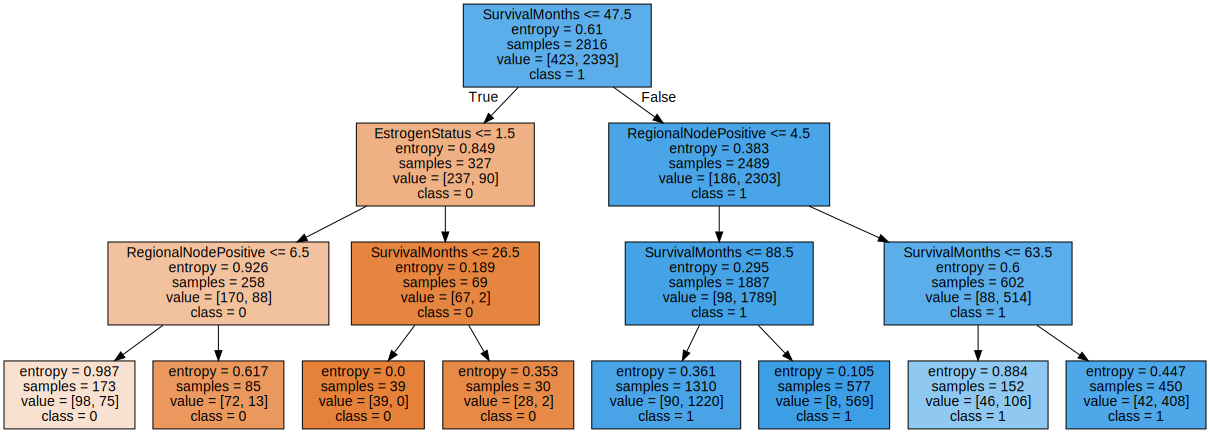

In [12]:
# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=top_features,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render('BreastCancerDecisionTree_depth3',format='png', view=False)

graph

Now, we can try generating a validation curve to test depths 1 through 8, to find the optimal max depth for our data. 

In [13]:
def error_rate(y, y_hat):
    return np.sum(np.abs(y - y_hat))/len(y)*100

In [14]:
def validation_curve(seed, X, y, min_depth, max_depth, test_size=0.30):
    train_scores = []
    test_scores = []
    
    for i in range(min_depth, max_depth + 1):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
        
        clf = DecisionTreeClassifier(criterion="entropy", random_state=101, max_depth=i)

        clf = clf.fit(X_train,y_train)
        
        y_pred = clf.predict(X_train)
        train_scores.append(error_rate(y_train, y_pred))
        
        y_pred = clf.predict(X_test)
        test_scores.append(error_rate(y_test, y_pred))
        
    return train_scores, test_scores

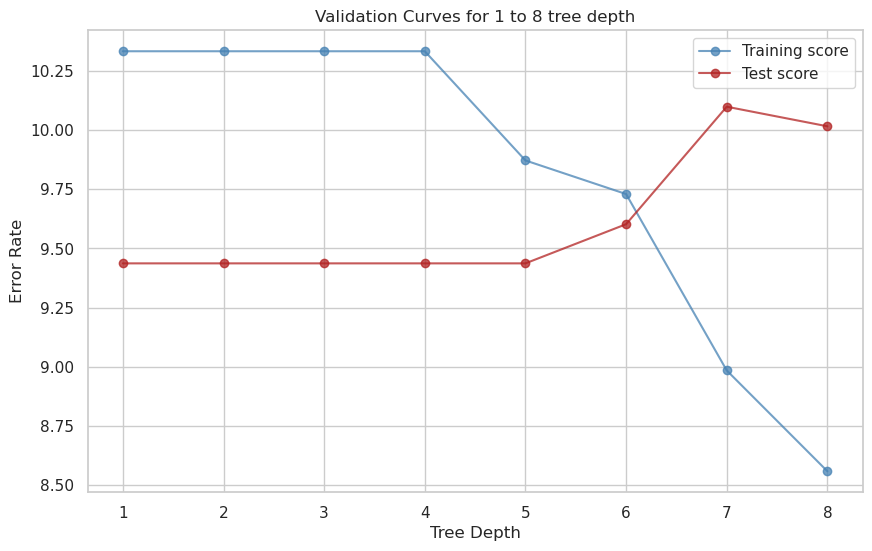

In [15]:
seed = 101
min_depth = 1
max_depth = 8
param_range = range(min_depth, max_depth + 1)
x_label = 'Tree Depth'
y_label = 'Error Rate'
title = "Validation Curves for {0} to {1} tree depth".format(min_depth, max_depth)

train_scores, test_scores = validation_curve(seed, X, y, min_depth, max_depth)

figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.plot(param_range, train_scores, 'o-', color="steelblue", alpha=0.75, label="Training score")
axes.plot(param_range, test_scores, "o-", color="firebrick", alpha=0.75, label="Test score")
axes.set_xlabel(x_label)
axes.set_ylabel(y_label)
axes.set_title(title)
plt.legend(loc="best")
plt.show()
plt.close()

Based on these results, a max depth = 6 is the ideal tree depth for our data. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state = 1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8774834437086093


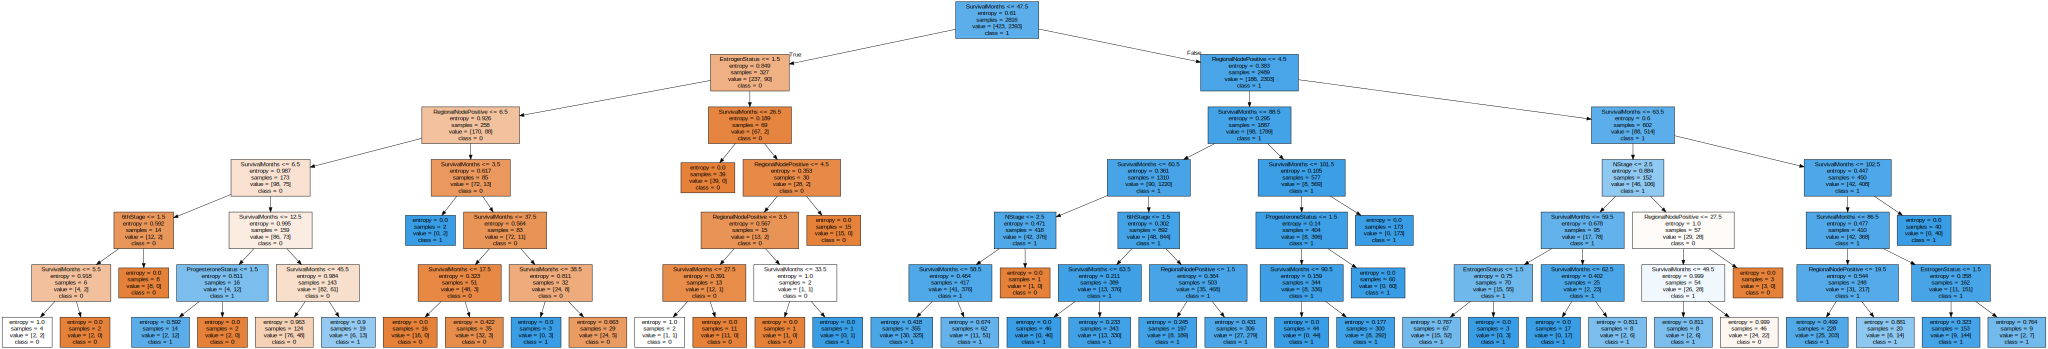

In [18]:
# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=top_features,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render('BreastCancerDecisionTree',format='png', view=False)

graph

#### References

[1] https://machinelearningmastery.com/feature-selection-machine-learning-python/

[2] https://www.datacamp.com/community/tutorials/decision-tree-classification-python